## 데이터 분석 전 학습
#### 리스트와 행렬의 차이점
- 행렬구조에 특화된 넘파이 모듈에 대해 알아보기
- 행렬은 행과 영의 갯수가 인덱싱마다 같아야 하고,
- 연산시 자료형의 성격이 같아야 함

- list: 사용자가 막 사용할수 있도록 만든 구조(입력하기 사용)
- array: 계산에 최적화 된 행과 열 처리 사용 기법(속도가 빠름, GPU등, 게임 필수)
- numpy: array에 최적화된 연산식 계산 모듈

## import
> numpy / matplotlib / Image / os / shutil

In [36]:
import numpy as np
import matplotlib.pyplot as plt # 차트 처리
from PIL import Image # 이미지 처리
import os
import glob # 폴더 내 목록보기
import shutil # 파일 또는 폴더 복사

## array 기본

In [37]:
x = [[2, 3, 4], [22, 33, 44]]
y = np.array(x) + 2 # numpy.array(리스트명) : 리스트를 행렬로 만듬

print(len(y)) # len(리스트명) : 행렬의 행의 갯수 == 2
print(len(y[0])) # len(리스트명[0]) : 행렬의 열의 갯수 == 3
print(np.shape(y)) # 행렬의 구조 == 2행 3열
print(y.shape) # np.shape() 처럼 행렬의 구조
print(y)

x = [[1,1,1],[2,2,2],[3,3,3]]
values = 100
y = np.array(x)
print(y + 100)
print(y * values)

2
3
(2, 3)
(2, 3)
[[ 4  5  6]
 [24 35 46]]
[[101 101 101]
 [102 102 102]
 [103 103 103]]
[[100 100 100]
 [200 200 200]
 [300 300 300]]


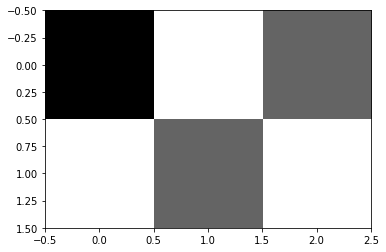

In [38]:
x = [[0, 255, 100], [255, 100, 255]]
plt.imshow(x,cmap='gray')

## 브로드캐스팅
조건: 두 배열이 뒤에서부터 대응하는 축의 크기가 동일하거나, 1 이어야만 함. 만약 조건이 충족되지 않으면 ValueError가 발생함
- 아래 예시에서는 맨 뒤는 5로 동일하고, 1과 4는 둘 중 하나가 1이라서 가능

In [39]:
arr1 = np.arange(15).reshape(3, 1, 5)
arr2 = np.arange(20).reshape(   4, 5)
print(np.shape(arr2))
arr1 * arr2

(4, 5)


array([[[  0,   1,   4,   9,  16],
        [  0,   6,  14,  24,  36],
        [  0,  11,  24,  39,  56],
        [  0,  16,  34,  54,  76]],

       [[  0,   6,  14,  24,  36],
        [ 25,  36,  49,  64,  81],
        [ 50,  66,  84, 104, 126],
        [ 75,  96, 119, 144, 171]],

       [[  0,  11,  24,  39,  56],
        [ 50,  66,  84, 104, 126],
        [100, 121, 144, 169, 196],
        [150, 176, 204, 234, 266]]])

## 파일 또는 폴더 복사하기
> os, glob

In [40]:
folderName = './pic'
file_list = os.listdir(folderName)
print(file_list)

# filter(os.path.isdir, glob.glob('./*'))
dataList = glob.glob('pic/*') # 여기부터는 glob 라이브러리 사용
folderList = list()
for i in dataList:
    if '.' not in i[4:]: # . (확장자)이 없으면 폴더
        folderList.append(i)
print(folderList)

folderList = list()
for i in dataList:
    if len(i.split('.')) == 1: # 이건 split() 함수 사용
        folderList.append(i) # . 으로 나눴을 때 1이면 . 이 없는 것(안 나눠짐)
print(folderList)

['gold.jpg', 'money.jpg', 'papago.png', 'python.jpg', 'testFolder_01', 'testFolder_02']
['pic\\testFolder_01', 'pic\\testFolder_02']
['pic\\testFolder_01', 'pic\\testFolder_02']


## 파일의 이미지 불러오기
> pillow

[[[152  84  21]
  [185 110  28]
  [197 124  31]
  ...
  [139  41   0]
  [164  61   5]
  [199 133  35]]

 [[145  78  18]
  [184 109  28]
  [197 124  31]
  ...
  [146  55   6]
  [146  48   1]
  [197 125  31]]

 [[136  73  18]
  [184 109  28]
  [197 124  30]
  ...
  [148  62  10]
  [137  43   4]
  [195 115  19]]

 ...

 [[ 55  13   6]
  [139  77  21]
  [177 111  27]
  ...
  [196 127  30]
  [176 103  23]
  [184 115  26]]

 [[ 88  38  11]
  [166 101  29]
  [180 115  31]
  ...
  [181 108  23]
  [179 108  26]
  [205 144  40]]

 [[116  55  17]
  [175 110  31]
  [181 116  30]
  ...
  [175 102  20]
  [198 133  34]
  [221 176  58]]]
[[[152  84  21]
  [185 110  28]
  [197 124  31]
  ...
  [139  41   0]
  [164  61   5]
  [199 133  35]]

 [[145  78  18]
  [184 109  28]
  [197 124  31]
  ...
  [146  55   6]
  [146  48   1]
  [197 125  31]]

 [[136  73  18]
  [184 109  28]
  [197 124  30]
  ...
  [148  62  10]
  [137  43   4]
  [195 115  19]]

 ...

 [[ 55  13   6]
  [139  77  21]
  [177 111  27]
  ..

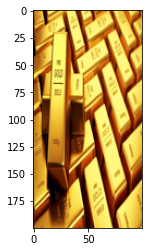

In [41]:
for i in range(len(dataList)):
    fileName = dataList[0]
    img = Image.open(fileName)
		# 이미지의 크기를 너비 100, 높이 200로 조정
		# --> 행은 200, 열은 100
    img = img.resize((100, 200))
    imgArray = np.array(img) # 이미지를 array로 바꾸기
    print(imgArray) # 이미지의 배열을 출력
    plt.imshow(imgArray) # pillow 라이브러리로 이미지 출력

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(4, 2, 3)


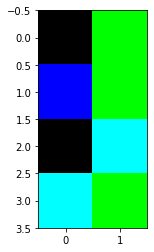

In [42]:
arr1 = [[[255, 0, 0], [0,255, 0]],
[[0, 0, 255], [0, 255, 0]],
[[0, 0, 0], [255, 255, 255]],
[[0, 255, 255], [255, 255, 0]]]
imgarr1 = np.array(arr1) # 리스트를 배열로 만듬
print(np.shape(imgarr1))
# plt.imshow(imgarr1 * [0])
# plt.imshow(imgarr1 * [0, 0, 255])
plt.imshow(imgarr1 * [[0, 255, 255], [0, 255, 255]])

In [43]:
# # 폴더 하나만 복사
# folderName = './pic'
# newName = folderName + '복사본'
# shutil.copytree(folderName, newName)

# # for문으로 폴더 여러개 복사
# for folderName in folderList:
#     newName = folderName + '복사본'
#     shutil.copytree(folderName, newName)

In [44]:
x = np.array([[22, 3, 4], [2, 2, 3]]) # 1번 사람[x1, x2, x3] , 2번 사람[x1, x2, x3]
y = np.array([100, 150]) # 1번 사람의 혈압 = 100, 2번사람의 혈압 = 150
w = np.array([3, 5, 8]) # x1의 w 값 = 3, x2의 w값 = 5, x3의 w값= 8

# w, y 값은 외부에서 가져옴
# w 값은 랜덤하게 설정함

y1 = x * w # ([22 * 3, 3 * 5, 4 * 8], [2 * 3, 2 * 5, 3 * 8]])
y_hat = list() # 예측값
for i in y1:
    y_hat.append(i.sum())